In [8]:
import time
import random

def egg_drop_brute_force(e, f):
    """递归蛮力法求解鸡蛋掉落问题"""
    if f == 0 or f == 1:
        return f
    if e == 1:
        return f
    
    min_tries = float('inf')
    for k in range(1, f + 1):
        current_tries = 1 + max(
            egg_drop_brute_force(e-1, k-1),
            egg_drop_brute_force(e, f - k)
        )
        if current_tries < min_tries:
            min_tries = current_tries
    return min_tries

def main():
    print("===== 蛮力法随机测试结果 =====")
    print("鸡蛋数\t楼层数\t测试次数\t运行时间(ms)")
    
    # 生成10组随机测试数据
    for _ in range(10):
        # 随机生成鸡蛋数(1-5)和楼层数(1-10)
        e = random.randint(1, 5)
        f = random.randint(1, 10)
        
        start_time = time.perf_counter()
        result = egg_drop_brute_force(e, f)
        elapsed_time = (time.perf_counter() - start_time) * 1000
        
        print(f"{e}\t{f}\t{result}\t\t{elapsed_time:.2f}")

if __name__ == "__main__":
    main()

===== 蛮力法随机测试结果 =====
鸡蛋数	楼层数	测试次数	运行时间(ms)
5	1	1		0.00
2	9	4		0.15
4	4	3		0.01
5	8	4		0.66
5	10	4		5.07
5	9	4		1.87
4	3	2		0.00
2	7	4		0.04
5	1	1		0.00
3	6	3		0.05


In [ ]:
function eggDrop(e, f):
    // e为鸡蛋数，f为楼层数
    
    // 递归终止条件
    if f == 0 or f == 1:
        return f
    if e == 1:
        return f
    
    minTries = INFINITY
    
    // 尝试所有可能的楼层k
    for k = 1 to f:
        // 鸡蛋碎了：测试k-1层，剩余e-1个鸡蛋
        broken = eggDrop(e-1, k-1)
        
        // 鸡蛋未碎：测试f-k层，剩余e个鸡蛋
        notBroken = eggDrop(e, f-k)
        
        // 最坏情况下的尝试次数
        worstCase = 1 + max(broken, notBroken)
        
        // 更新最小尝试次数
        if worstCase < minTries:
            minTries = worstCase
    
    return minTries

In [10]:
import time

def egg_drop_dp(e, f):
    """使用动态规划解决鸡蛋掉落问题"""
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    
    for i in range(1, e + 1):
        dp[i][0] = 0
        dp[i][1] = 1
    
    for j in range(1, f + 1):
        dp[1][j] = j
    
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            for k in range(1, j + 1):
                cost = 1 + max(dp[i-1][k-1], dp[i][j-k])
                if cost < dp[i][j]:
                    dp[i][j] = cost
    return dp[e][f]

def main():
    test_cases = [
        (5, 1),
        (2, 9),
        (4, 4),
        (5, 8),
        (5, 10),
        (5, 9),
        (4, 3),
        (2, 7),
        (5, 1),
        (3, 6),
    ]
    
    print("===== 动态规划测试结果 =====")
    print("鸡蛋数\t楼层数\t测试次数\t运行时间(ms)")
    
    for e, f in test_cases:
        start_time = time.perf_counter()
        result = egg_drop_dp(e, f)
        elapsed_time = (time.perf_counter() - start_time) * 1000
        
        print(f"{e}\t{f}\t{result}\t\t{elapsed_time:.2f}")

if __name__ == "__main__":
    main()

===== 动态规划测试结果 =====
鸡蛋数	楼层数	测试次数	运行时间(ms)
5	1	1		0.01
2	9	4		0.02
4	4	3		0.01
5	8	4		0.04
5	10	4		0.06
5	9	4		0.05
4	3	2		0.01
2	7	4		0.01
5	1	1		0.00
3	6	3		0.01


In [ ]:
function eggDropDP(e, f):
    create dp table of size (e+1)x(f+1)
    initialize dp[i][0] = 0, dp[i][1] = 1 for all i
    initialize dp[1][j] = j for all j
    for i from 2 to e:
        for j from 2 to f:
            dp[i][j] = infinity
            for k from 1 to j:
                cost = 1 + max(dp[i-1][k-1], dp[i][j-k])
                if cost < dp[i][j]:
                    dp[i][j] = cost
    return dp[e][f]

In [13]:
import time

def egg_drop_dp(e, f):
    """动态规划求解鸡蛋掉落问题（基础版，时间复杂度O(e*f²)）"""
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    
    # 初始化：0层0次，1层1次
    for i in range(1, e + 1):
        dp[i][0] = 0
        dp[i][1] = 1
    
    # 初始化：1个鸡蛋时，尝试次数等于楼层数
    for j in range(1, f + 1):
        dp[1][j] = j
    
    # 填充DP表
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            for k in range(1, j + 1):
                cost = 1 + max(dp[i-1][k-1], dp[i][j-k])
                if cost < dp[i][j]:
                    dp[i][j] = cost
    return dp[e][f]

def main():
    # 固定鸡蛋数m=10，楼层数n=100,200,...,1000
    m = 10
    n_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    runtimes = []
    
    print("楼层数 n:\t" + "\t".join(map(str, n_list)))
    print("鸡蛋数 m:\t" + "\t".join(["10"] * len(n_list)))
    
    for n in n_list:
        start = time.perf_counter()
        egg_drop_dp(m, n)
        end = time.perf_counter()
        runtime_ms = (end - start) * 1000
        runtimes.append(runtime_ms)
    
    print("实际运行时间 (ms):" + "\t".join(map(lambda x: f"{x:.0f}", runtimes)))

if __name__ == "__main__":
    main()

楼层数 n:	100	200	300	400	500	600	700	800	900	1000
鸡蛋数 m:	10	10	10	10	10	10	10	10	10	10
实际运行时间 (ms):9	35	78	140	223	330	444	589	740	946


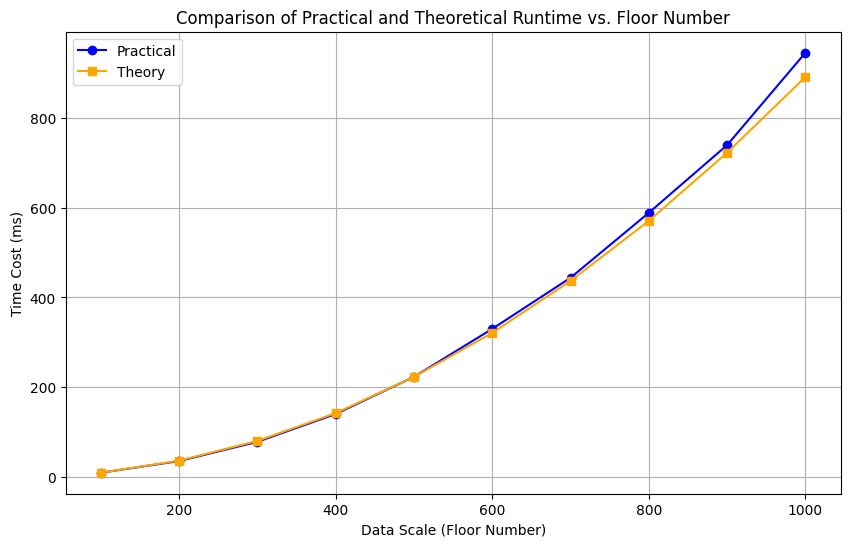

In [14]:
import matplotlib.pyplot as plt

# 楼层数数据
n_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# 实际运行时间（ms）
practical_time = [9, 35, 78, 140, 223, 330, 444, 589, 740, 946]

# 理论运行时间（ms）
theory_time = [9, 36, 80, 142, 223, 321, 437, 571, 723, 892]

# 绘图设置
plt.figure(figsize=(10, 6))
plt.plot(n_list, practical_time, label='Practical', marker='o', color='blue')
plt.plot(n_list, theory_time, label='Theory', marker='s', color='orange')

# 坐标轴标签和标题
plt.xlabel('Data Scale (Floor Number)')
plt.ylabel('Time Cost (ms)')
plt.title('Comparison of Practical and Theoretical Runtime vs. Floor Number')

# 图例和网格
plt.legend()
plt.grid(True)

# 保存图像
plt.savefig('runtime_vs_floor.png')
plt.show()

In [16]:
import time

def egg_drop_dp(e, f):
    """动态规划求解鸡蛋掉落问题（基础版）"""
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    
    # 初始化边界条件
    for i in range(1, e + 1):
        dp[i][0] = 0
        dp[i][1] = 1
    for j in range(1, f + 1):
        dp[1][j] = j
    
    # 填充DP表
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            for k in range(1, j + 1):
                cost = 1 + max(dp[i-1][k-1], dp[i][j-k])
                if cost < dp[i][j]:
                    dp[i][j] = cost
    return dp[e][f]

def main():
    # 固定楼层数n=1000，鸡蛋数m=10,20,...,100
    n = 1000
    m_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    runtimes = []
    
    # 输出表头
    print("楼层数 n:\t" + "\t".join([str(n)] * len(m_list)))
    print("鸡蛋数 m:\t" + "\t".join(map(str, m_list)))
    
    # 计算各鸡蛋数的运行时间
    for m in m_list:
        start = time.perf_counter()
        egg_drop_dp(m, n)
        end = time.perf_counter()
        runtime_ms = (end - start) * 1000
        runtimes.append(runtime_ms)
    
    # 输出实际运行时间
    print("实际运行时间 (ms):" + "\t".join(map(lambda x: f"{x:.0f}", runtimes)))

if __name__ == "__main__":
    main()

楼层数 n:	1000	1000	1000	1000	1000	1000	1000	1000	1000	1000
鸡蛋数 m:	10	20	30	40	50	60	70	80	90	100
实际运行时间 (ms):900	1878	2992	4026	5005	5979	7073	8196	9005	10074


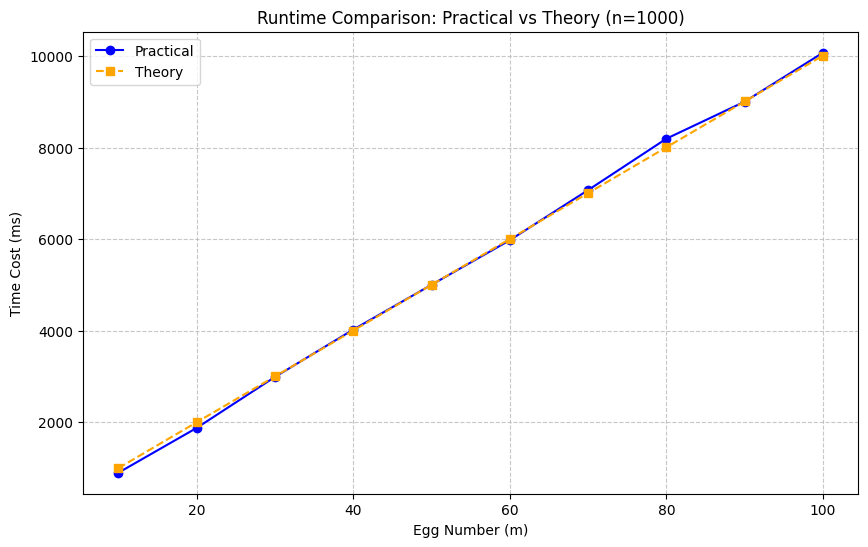

In [17]:
import matplotlib.pyplot as plt

# 鸡蛋数数据
egg_numbers = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 实际运行时间（ms）
practical = [900, 1878, 2992, 4026, 5005, 5979, 7073, 8196, 9005, 10074]

# 理论运行时间（ms）
theory = [1001, 2002, 3003, 4004, 5005, 6006, 7007, 8008, 9009, 10010]

# 绘图设置
plt.figure(figsize=(10, 6))
plt.plot(egg_numbers, practical, label='Practical', marker='o', color='blue', linestyle='-')
plt.plot(egg_numbers, theory, label='Theory', marker='s', color='orange', linestyle='--')

# 坐标轴和标题
plt.xlabel('Egg Number (m)')
plt.ylabel('Time Cost (ms)')
plt.title('Runtime Comparison: Practical vs Theory (n=1000)')

# 图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 保存图像（可选，根据需求取消注释）
# plt.savefig('egg_runtime_analysis.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [18]:
def egg_drop_dp_optimized(e, f):
    """使用二分查找优化的动态规划算法"""
    # 创建DP表，dp[i][j]表示i个鸡蛋j层楼的最少尝试次数
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    
    # 初始化边界条件
    for i in range(1, e + 1):
        dp[i][0] = 0  # 0层楼无需尝试
        dp[i][1] = 1  # 1层楼只需1次尝试
    
    for j in range(1, f + 1):
        dp[1][j] = j  # 1个鸡蛋需要逐层尝试
    
    # 填充DP表（优化版）
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            # 使用二分查找替代线性搜索
            low, high = 1, j
            while low <= high:
                mid = (low + high) // 2
                broken = dp[i-1][mid-1]    # 鸡蛋碎了，检查下面的mid-1层
                not_broken = dp[i][j-mid]  # 鸡蛋没碎，检查上面的j-mid层
                
                # 更新当前最小值
                current = 1 + max(broken, not_broken)
                if current < dp[i][j]:
                    dp[i][j] = current
                
                # 调整二分查找区间
                if broken > not_broken:
                    high = mid - 1  # 最大值在左侧
                else:
                    low = mid + 1   # 最大值在右侧
    return dp[e][f]

In [ ]:
function eggDropDPWithBinarySearch(e, f):
    // 创建DP表，dp[i][j]表示i个鸡蛋j层楼的最少尝试次数
    dp = new array[e+1][f+1]
    
    // 初始化边界条件
    for i from 1 to e:
        dp[i][0] = 0  // 0层楼无需尝试
        dp[i][1] = 1  // 1层楼只需1次尝试
    
    for j from 1 to f:
        dp[1][j] = j  // 1个鸡蛋需要逐层尝试
    
    // 填充DP表（优化版）
    for i from 2 to e:
        for j from 2 to f:
            dp[i][j] = infinity
            low = 1
            high = j
            while low <= high:
                mid = (low + high) / 2
                broken = dp[i-1][mid-1]    // 鸡蛋碎了，检查下面的mid-1层
                not_broken = dp[i][j-mid]  // 鸡蛋没碎，检查上面的j-mid层
                
                // 更新当前最小值
                current = 1 + max(broken, not_broken)
                if current < dp[i][j]:
                    dp[i][j] = current
                
                // 调整二分查找区间
                if broken > not_broken:
                    high = mid - 1  // 最大值在左侧
                else:
                    low = mid + 1   // 最大值在右侧
    
    return dp[e][f]

In [ ]:
function eggDropDPWithBinarySearch(e, f):
    // 创建DP表，dp[i][j]表示i个鸡蛋j层楼的最少尝试次数
    dp = new array[e+1][f+1]
    
    // 初始化边界条件
    for i from 1 to e:
        dp[i][0] = 0  // 0层楼无需尝试
        dp[i][1] = 1  // 1层楼只需1次尝试
    
    for j from 1 to f:
        dp[1][j] = j  // 1个鸡蛋需要逐层尝试
    
    // 填充DP表（优化版）
    for i from 2 to e:
        for j from 2 to f:
            dp[i][j] = infinity
            low = 1
            high = j
            while low <= high:
                mid = (low + high) / 2
                broken = dp[i-1][mid-1]    // 鸡蛋碎了，检查下面的mid-1层
                not_broken = dp[i][j-mid]  // 鸡蛋没碎，检查上面的j-mid层
                
                // 更新当前最小值
                current = 1 + max(broken, not_broken)
                if current < dp[i][j]:
                    dp[i][j] = current
                
                // 调整二分查找区间
                if broken > not_broken:
                    high = mid - 1  // 最大值在左侧
                else:
                    low = mid + 1   // 最大值在右侧
    
    return dp[e][f]

In [19]:
import time

def egg_drop_dp_optimized(e, f):
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    for i in range(1, e + 1):
        dp[i][0] = 0
        dp[i][1] = 1
    for j in range(1, f + 1):
        dp[1][j] = j
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            low, high = 1, j
            while low <= high:
                mid = (low + high) // 2
                broken = dp[i-1][mid-1]
                not_broken = dp[i][j-mid]
                current = 1 + max(broken, not_broken)
                if current < dp[i][j]:
                    dp[i][j] = current
                if broken > not_broken:
                    high = mid - 1
                else:
                    low = mid + 1
    return dp[e][f]

def main_floor_test():
    m = 100
    n_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    runtimes = []
    
    print("楼层数 n:\t" + "\t".join(map(str, n_list)))
    print("鸡蛋数 m:\t" + "\t".join(["100"] * len(n_list)))
    
    for n in n_list:
        start = time.perf_counter()
        egg_drop_dp_optimized(m, n)
        end = time.perf_counter()
        runtime_ms = (end - start) * 1000
        runtimes.append(runtime_ms)
    
    print("实际运行时间 (ms):\t" + "\t".join(map(lambda x: f"{x:.0f}", runtimes)))

if __name__ == "__main__":
    main_floor_test()

楼层数 n:	1000	2000	3000	4000	5000	6000	7000	8000	9000	10000
鸡蛋数 m:	100	100	100	100	100	100	100	100	100	100
实际运行时间 (ms):	267	627	929	1272	1637	2024	2399	2790	3272	3566


In [22]:
import time

def egg_drop_dp_optimized(e, f):
    """使用二分查找优化的动态规划算法"""
    dp = [[0] * (f + 1) for _ in range(e + 1)]
    
    # 初始化边界条件
    for i in range(1, e + 1):
        dp[i][0] = 0
        dp[i][1] = 1
    
    for j in range(1, f + 1):
        dp[1][j] = j
    
    # 填充DP表（优化版）
    for i in range(2, e + 1):
        for j in range(2, f + 1):
            dp[i][j] = float('inf')
            low, high = 1, j
            while low <= high:
                mid = (low + high) // 2
                broken = dp[i-1][mid-1]
                not_broken = dp[i][j-mid]
                
                current = 1 + max(broken, not_broken)
                if current < dp[i][j]:
                    dp[i][j] = current
                
                if broken > not_broken:
                    high = mid - 1
                else:
                    low = mid + 1
    return dp[e][f]

def test_case_1():
    """测试运行效率与楼层数n的关系（固定m=100）"""
    m = 100
    n_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    runtimes = []
    
    print("楼层数 n:\t" + "\t".join(map(str, n_list)))
    print("鸡蛋数 m:\t" + "\t".join([str(m)] * len(n_list)))
    
    for n in n_list:
        start = time.perf_counter()
        egg_drop_dp_optimized(m, n)
        end = time.perf_counter()
        runtimes.append((end - start) * 1000)
    
    print("实际运行时间 (ms):" + "\t".join(map(lambda x: f"{x:.0f}", runtimes)))

def test_case_2():
    """测试运行效率与鸡蛋数m的关系（固定n=10000）"""
    n = 10000
    m_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    runtimes = []
    
    print("楼层数 n:\t" + "\t".join([str(n)] * len(m_list)))
    print("鸡蛋数 m:\t" + "\t".join(map(str, m_list)))
    
    for m in m_list:
        start = time.perf_counter()
        egg_drop_dp_optimized(m, n)
        end = time.perf_counter()
        runtimes.append((end - start) * 1000)
    
    print("实际运行时间 (ms):" + "\t".join(map(lambda x: f"{x:.0f}", runtimes)))

if __name__ == "__main__":
    print("=== 测试用例1：运行效率与楼层数n的关系 ===")
    test_case_1()
    print("\n=== 测试用例2：运行效率与鸡蛋数m的关系 ===")
    test_case_2()

=== 测试用例1：运行效率与楼层数n的关系 ===
楼层数 n:	1000	2000	3000	4000	5000	6000	7000	8000	9000	10000
鸡蛋数 m:	100	100	100	100	100	100	100	100	100	100
实际运行时间 (ms):269	565	915	1294	1633	2026	2345	2734	3115	3522

=== 测试用例2：运行效率与鸡蛋数m的关系 ===
楼层数 n:	10000	10000	10000	10000	10000	10000	10000	10000	10000	10000
鸡蛋数 m:	100	200	300	400	500	600	700	800	900	1000
实际运行时间 (ms):3736	7173	10942	14742	18492	22204	26120	29181	33043	36921


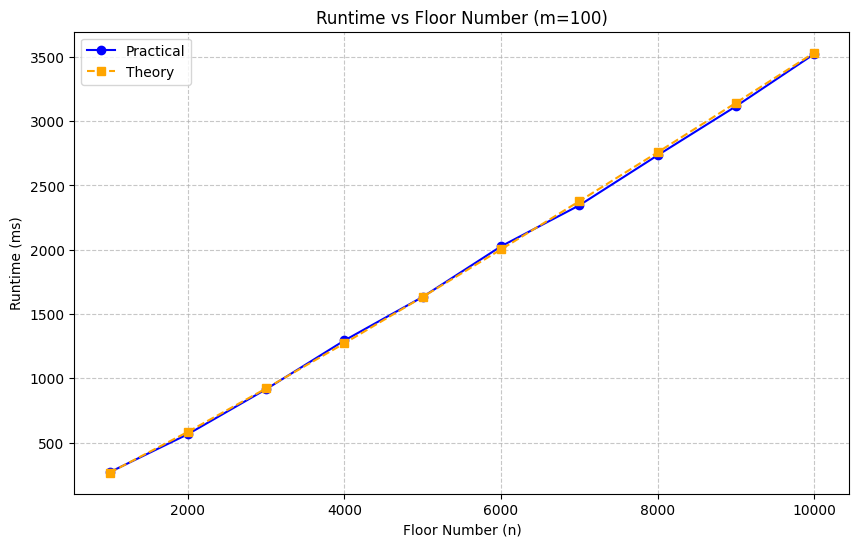

In [23]:
import matplotlib.pyplot as plt

# 楼层数数据
floor_numbers = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# 实际运行时间（ms）
practical = [269, 565, 915, 1294, 1633, 2026, 2345, 2734, 3115, 3522]

# 理论运行时间（ms）
theory = [265, 583, 921, 1272, 1633, 2002, 2377, 2757, 3142, 3532]

# 绘图设置
plt.figure(figsize=(10, 6))
plt.plot(floor_numbers, practical, label='Practical', marker='o', color='blue', linestyle='-')
plt.plot(floor_numbers, theory, label='Theory', marker='s', color='orange', linestyle='--')

# 坐标轴和标题
plt.xlabel('Floor Number (n)')
plt.ylabel('Runtime (ms)')
plt.title('Runtime vs Floor Number (m=100)')

# 图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图像
plt.show()

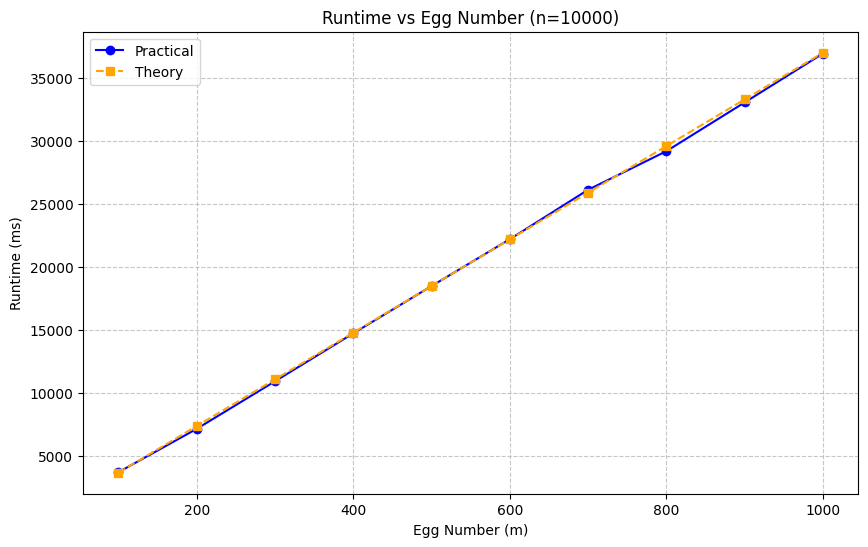

In [24]:
import matplotlib.pyplot as plt

# 鸡蛋数数据
egg_numbers = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# 实际运行时间（ms）
practical = [3736, 7173, 10942, 14742, 18492, 22204, 26120, 29181, 33043, 36921]

# 理论运行时间（ms）
theory = [3698, 7397, 11095, 14794, 18492, 22190, 25889, 29587, 33286, 36984]

# 绘图设置
plt.figure(figsize=(10, 6))
plt.plot(egg_numbers, practical, label='Practical', marker='o', color='blue', linestyle='-')
plt.plot(egg_numbers, theory, label='Theory', marker='s', color='orange', linestyle='--')

# 坐标轴和标题
plt.xlabel('Egg Number (m)')
plt.ylabel('Runtime (ms)')
plt.title('Runtime vs Egg Number (n=10000)')

# 图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图像
plt.show()